In [45]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from tqdm import tqdm

hex_ids = ['8a1f1a8d9d97fff',
           '8a1f1a8cb4cffff',
           '8a1f1a8cb4dffff',
           '8a1f1a8cb71ffff',
           '881f1a8cb7fffff',
           '881f1a164bfffff',
           '881f1a8cbdfffff'
           ]

hex_id = hex_ids[6]

days=365 # (4 years = 1460 days)
year=2020 # start of time series data

data_columns = ['idle_time','bike_count']

In [46]:
df = pd.read_csv('../data/final_df_points_18_21_class.csv')
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')
df

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,day,start_min,over_night,idle_time_next_day,idle_time,idle_time_class,on_station,hex_enc,zone_name_enc,time_start
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,6,1427,1,821,12,1,1,320,4,2017-12-31 23:47:09
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,6,1427,1,1439,12,1,1,320,4,2017-12-31 23:47:15
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,1,Pinke Zone Leipzig Ost 1€,0,10.80,...,6,1437,1,1439,2,1,0,133,3,2017-12-31 23:57:18
3,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,0,0,0,0,821,4,1,320,4,2018-01-01 00:00:00
4,2508,51.323619,12.335887,1514764800,1514851199,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,0,0,1,878,1439,4,1,320,4,2018-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375898,72058,51.317569,12.382730,1640897593,1640904368,881f1a1609fffff,1,Blaue Zone Leipzig Ost 0€,0,13.19,...,3,1253,0,0,112,2,0,98,1,2021-12-30 20:53:13
2375899,71949,51.334711,12.356763,1640897835,1640899343,881f1a1649fffff,1,Pinke Zone Leipzig Ost 1€,0,13.19,...,3,1257,0,0,25,1,0,126,3,2021-12-30 20:57:15
2375900,97785,51.367276,12.369792,1640898086,1640900985,881f1a8c8bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.05,...,3,1261,0,0,48,1,0,261,1,2021-12-30 21:01:26
2375901,41738,51.366942,12.370322,1640900918,1640903516,881f1a8c8bfffff,1,Pinke Zone Leipzig Ost 1€,0,13.05,...,3,1309,0,0,43,1,0,261,3,2021-12-30 21:48:38


In [ ]:
# GET ALL RENTALS FORM HEX_ID

onedfhexid = pd.DataFrame(columns=df.columns)
for ind in tqdm(df.index):
    if df['hex_id'][ind] == hex_id:
        onedfhexid.loc[df.index[ind]] = df.iloc[ind]
        #onedfhexid.append(df[ind], ignore_index = True)
onedfhexid = onedfhexid.reset_index(drop=True)
onedfhexid.head()

In [48]:
onedfhexid = df.copy()

In [49]:
# DEFINE TIME SERIES RANGE
# sets the data as index of time series (ts) data

rng = pd.date_range(f'{year}-01-01', periods=days, freq='D')
tsdata = pd.DataFrame({ 'date': rng, 'idle_time' : np.nan, 'list': np.nan, 'bike_count': np.nan})
tsdata = tsdata.set_index('date')
tsdata.head()

,idle_time,list,bike_count
date,,,
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN


In [50]:
# ADD ROWS TO DAYS
# compute idle time mean for one day over all rentals at that day

# iteriere über alle Tage
for date in tqdm(tsdata.index):
    list = []
    # Adde alle Rows in die List wenn Tag = Tag
    for ind in onedfhexid.index:
        if date.date() == onedfhexid['time_start'][ind].date():
            list.append(onedfhexid['idle_time'][ind])
    #print(len(list))
    # Setze Mittelwert für Tage
    if len(list) == 0:
        tsdata['bike_count'][date] = 1
        continue
    else:
        tsdata['bike_count'][date] = len(list)
        tsdata['idle_time'][date] = statistics.mean(list)
tsdata.head()

100%|██████████| 365/365 [2:00:57<00:00, 19.88s/it]  


,idle_time,list,bike_count
date,,,
2020-01-01,285.0,NaN,740.0
2020-01-02,343.0,NaN,784.0
2020-01-03,333.0,NaN,848.0
2020-01-04,418.0,NaN,695.0
2020-01-05,356.0,NaN,766.0


In [51]:
# FILL MISSING DATA

tsdata = tsdata.asfreq('D')
tsdata = tsdata.ffill()

In [52]:
# TOTAL BIKE COUNT

total_bike_count = int(tsdata['bike_count'].sum())
total_bike_count

707277

In [53]:
# CREATE ROLLING WINDOW WITH MEAN

data_7d_rol = tsdata[data_columns].rolling(window = 7, center = True).mean()
data_2m_rol = tsdata[data_columns].rolling(window = 60, center = True).mean()

In [54]:
# CREATE ROLLING WEIGHTED MEAN

x = []
rng2 = pd.date_range(f'{year}-01-01', periods=days, freq='D')
data_7d_rol2 = pd.DataFrame({ 'date': rng2, 'idle_time' : np.nan})
data_7d_rol2 = data_7d_rol2.set_index('date')

for window in tsdata.rolling(window = 7 , center = True):
    #print(window)
    x.append(np.average(window['idle_time'], weights = window['bike_count']))
data_7d_rol2['idle_time'] = x

In [55]:
import pickle


def plot_details(tsdata,data_7d_rol,data_2m_rol,data_7d_mean2,hex_id,total_bike_count):
    fig, ax = plt.subplots(figsize = (20,10))

    # plotting daily data
    ax.plot(tsdata['idle_time'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
    # plotting 7-day rolling data
    ax.plot(data_7d_rol['idle_time'],color = 'blue', linewidth=2, label='7-d Rolling Mean')
    ax.plot(data_7d_mean2['idle_time'],color = 'green', linewidth=2, label='7-d Rolling Mean')
    # plotting 2-Month rolling data -trend-
    ax.plot(data_2m_rol['idle_time'], color='0.2', linewidth=3, label='Trend (2M)')
    ax.legend()
    ax.set_xlabel('day')
    ax.set_ylabel('timestood (min)')
    ax.set_title(f'Trends in idel time of bikes in hex: {hex_id} with a total of {total_bike_count} rentals')

    ax2 = ax.twinx()
    ax2.plot(data_7d_rol['bike_count'],linewidth=1, color='0.5',label='Bike Count 7-d RM')
    ax2.set_xlabel('day')
    ax2.set_ylabel('bikes in hex per day')
    ax2.legend()

    ## save

    #create a file
    picklefile = open(f'../data/time_series_data/tsdata_{hex_id}', 'wb')
    #pickle the dataframe
    pickle.dump(tsdata, picklefile)
    #close file
    picklefile.close()

    plt.savefig(f'../data/results/newtsdata/tsdata_{hex_id}', format='png')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/newtsdata/tsdata_881f1a8cbdfffff.png'

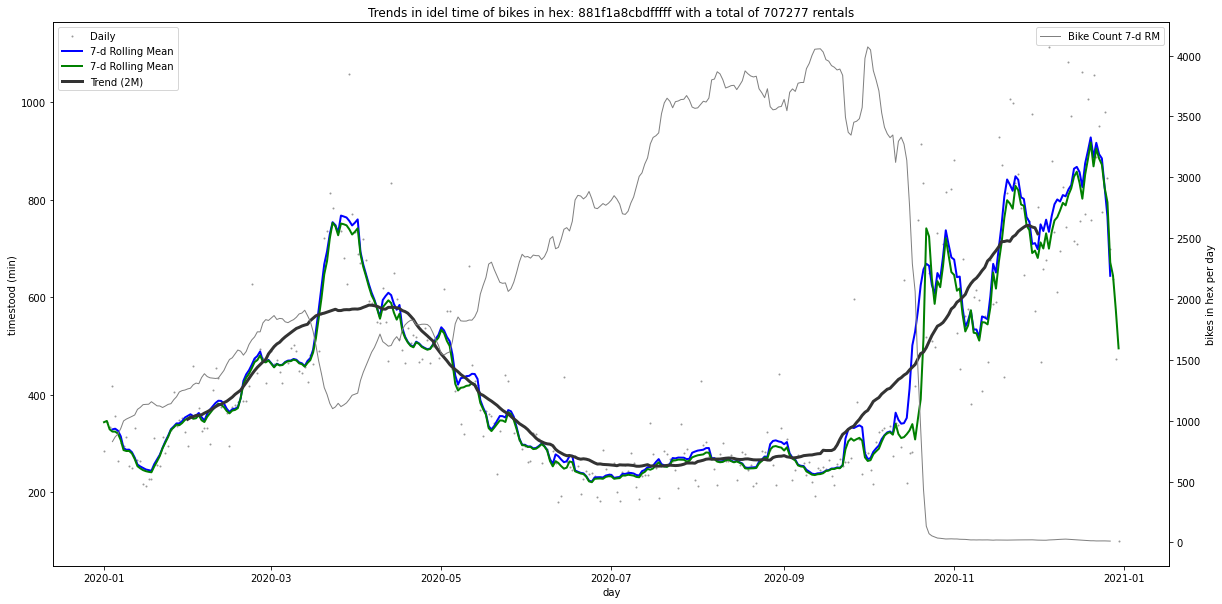

In [57]:
plot_details(tsdata,data_7d_rol,data_2m_rol,data_7d_rol2,hex_id,total_bike_count)